In [1]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd

sea.set_palette("muted")

In [2]:
data = pd.read_csv('../data/games-features.csv')
data.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

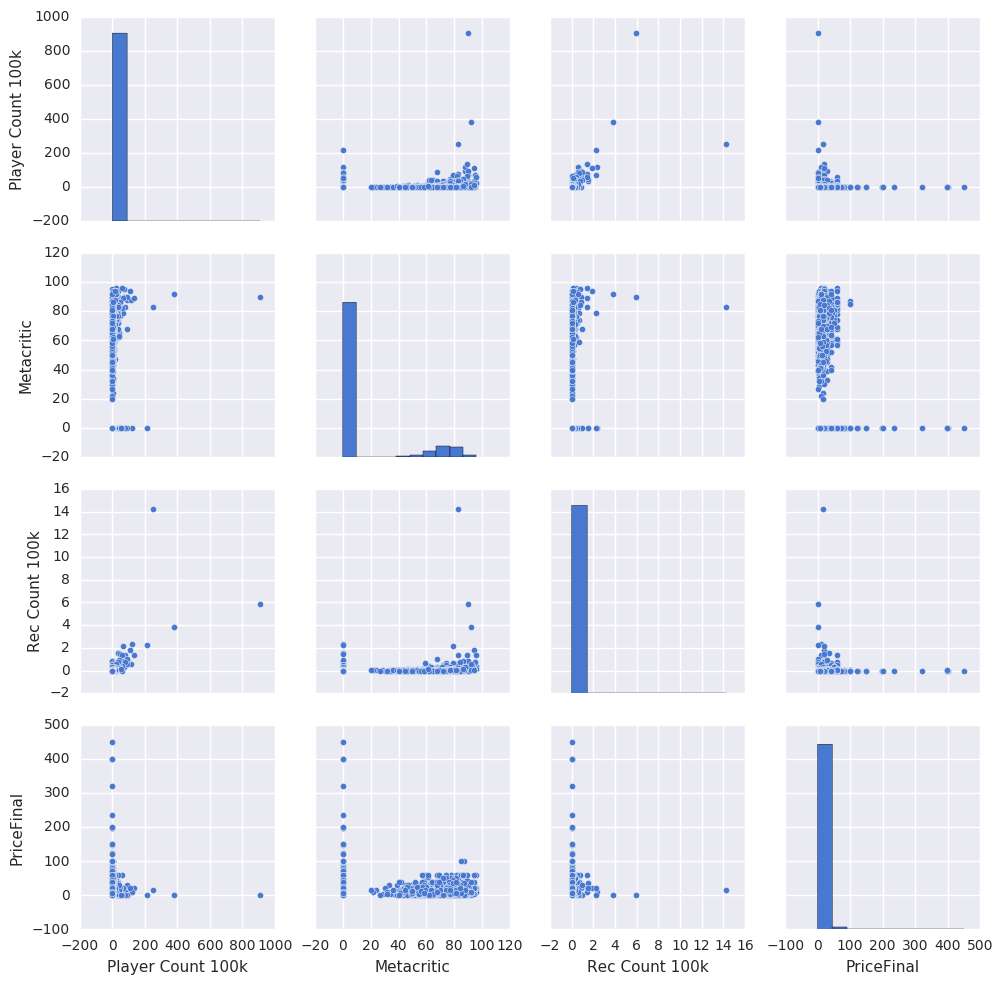

In [3]:
data["Rec Count 100k"] = data["RecommendationCount"] / 100000.0
data["Player Count 100k"] = data["SteamSpyPlayersEstimate"] / 100000.0

INTERESTING_NUMERICS = [
    "Player Count 100k", 
    "Metacritic", 
    "Rec Count 100k",
    "PriceFinal"
]   

plt.figure(figsize=(12,12));
sea.pairplot(data[INTERESTING_NUMERICS]);
plt.savefig("../report/numeric-exploration.png", bbox_inches='tight');

SteamSpyPlayersEstimate
Using upper bound 217551
count      9221.000000
mean      25965.833857
std       42159.281700
min         533.000000
25%        1973.000000
50%        7174.000000
75%       28158.000000
max      217372.000000
Name: SteamSpyPlayersEstimate, dtype: float64
--------------------
RecommendationCount
Using upper bound 5499
count    4393.000000
mean      800.000228
std      1018.212809
min       101.000000
25%       186.000000
50%       370.000000
75%       905.000000
max      5463.000000
Name: RecommendationCount, dtype: float64
--------------------
PriceFinal
Using upper bound 19.99
count    8852.000000
mean        7.346209
std         4.213272
min         0.190000
25%         3.990000
50%         6.990000
75%         9.990000
max        19.690000
Name: PriceFinal, dtype: float64
--------------------
PriceInitial
Using upper bound 19.99
count    8773.000000
mean        7.516065
std         4.131852
min         0.500000
25%         4.990000
50%         6.990000
75%   

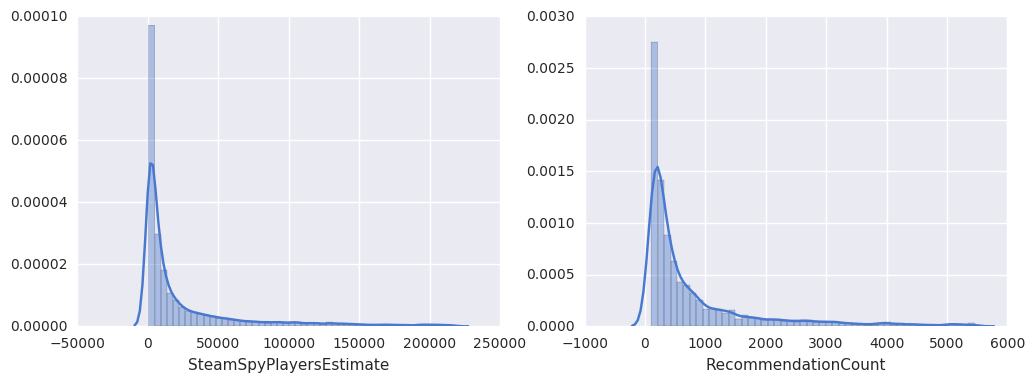

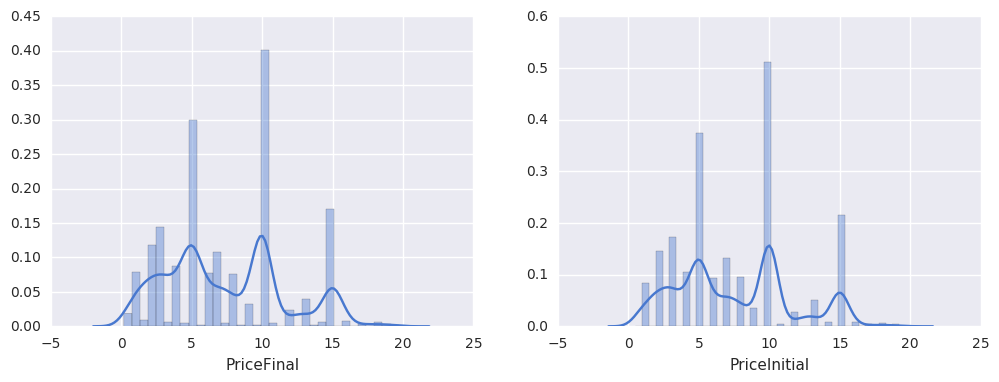

In [4]:
class PER:
    def __init__(self, per):
        self.per = per


def see_one(name, nonzero=True, bound=None, ax=None):
    print(name)
    d = data
    
    if nonzero:
        d = d[d[name] > 0.0]
    
    if bound:
        if isinstance(bound, PER):
            max_index = int(len(d[name]) * bound.per)
            bound = d[name].copy().sort_values().head(max_index).values[-1]
            print("Using upper bound", bound)
        d = d[d[name] < bound]
    
    d = d[name]
    
    print(d.describe())
    print('-'*20)
    if ax is None:
        plt.figure()
    sea.distplot(d, kde=True, rug=False, ax=ax)

fig, axes = plt.subplots(1, 2, figsize=(12,4));
for ax, col in zip(axes.flatten(), ["SteamSpyPlayersEstimate", "RecommendationCount"]):
    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)
plt.savefig("../report/player-count-recommends-distribution.png", bbox_inches='tight');
    
fig, axes = plt.subplots(1, 2, figsize=(12,4));
for ax, col in zip(axes.flatten(), ["PriceFinal", "PriceInitial"]):
    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)

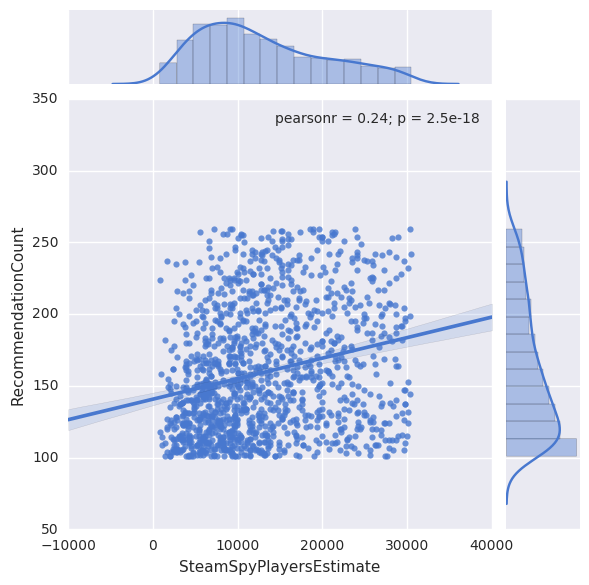

In [5]:
rec_num = data[["RecommendationCount", "SteamSpyPlayersEstimate"]].copy()

def get_bound(name):
    max_index = int(len(rec_num[name]) * 0.75)
    bound = rec_num[name].copy().sort_values().head(max_index).values[-1]
    return bound

def one_filt(src, name):
    return src[ (src[name] > 0) & (src[name] < get_bound(name)) ]

to_check = one_filt(one_filt(rec_num, "RecommendationCount"), "SteamSpyPlayersEstimate")
sea.jointplot("SteamSpyPlayersEstimate", "RecommendationCount", data=to_check, kind="reg");
plt.savefig("../report/player-count-recommends-jointwithreg.png", bbox_inches='tight');